## <Center>本节课知识点提炼</Center>

### 本节课重点与难点
* 重点：损失函数及梯度/反向传播
* 难点：反向传播

### 1.线性分类器

* 定义:  
    有监督学习中主要的两种学习任务分别是回归(Regression)和分类(Classification)；回归是预测某一个具体的值，而分类是预测所属类别。

    绝大多数机器学习任务都可以看作是某种分类问题。分类即给定一个输入集合，分类器预测每一个类别的概率; Label表示某个类别, 是一个离散的值;   
    如果数据中的Label只有两个类别，那么就属于二分类问题，相应的分类器被称为二分类器;  
    如果数据中的Label只有大于两个类别，那么就属于多分类问题，相应的分类器被称为多分类器;  
    例如，垃圾邮件分类器-判断邮件是否是垃圾邮件，是一个典型的二分类问题；而检测图片中出现个多个目标则是属于多分类问题。  
* 得分函数(Score Function)  
    $$f\left(x_{i}, W, b\right)=W x_{i}+b$$ 
    原始图像数据到类别分值的映射;  
    矩阵W和列向量b为该函数的参数(parameters), 参数W称为权重(weights), b被称为偏差向量(bias vector);  
    在实际情况中常常混用权重和参数这两个术语.  
* 损失函数(Loss Function)或称为代价函数(Cost Function)或目标函数(Objective Function) 
    用来量化预测分类标签的得分与真实标签之间一致性的;直观地讲，当评分函数输出结果与真实结果之间差异越大，损失函数输出越大，反之越小;    
    该方法可转化为一个最优化问题，在最优化过程中，将通过更新评分函数的参数来最小化损失函数值;  
* 正则化(Regularization)  
    Hinge Loss公式:$$L_{i}=\sum_{j \neq y_{i}} \max \left(0, w_{j}^{T} x_{i}-w_{y_{i}}^{T} x_{i}+\Delta\right)$$
    上述公式存在一个问题-W不唯一，假设有一个数据集和一个权重集W能够正确地分类每个数据(即所有的边界都满足，对于所有的i都有$L_{i}=0$);可能有很多相似的W都能正确地
    分类所有的数据。一个简单的例子：如果W能够正确分类所有数据，即对于每个数据，损失值都是0。那么当$\lambda > 1$时，任何$\lambda W$都能使得损失值为0，  
    为了解决这个问题引入了正则化惩罚项($R(W)$)，最常用的正则化惩罚是L2范数，L2范数通过对所有参数进行逐元素的平方惩罚来抑制大数值的权重：
    $$R(W)=\sum_{k} \sum_{l} W_{k, l}^{2}$$
    表达式中，将W中所有元素平方后求和;注意正则化函数不是数据的函数，仅基于权重.
    完整的多类SVM损失函数包括：数据损失(data loss)及正则化损失(regularization loss)。完整公式如下所示：$$L=\underbrace{\frac{1}{N} \sum_{i} L_{i}}_{\text {data loss}}+\underbrace{\lambda R(W)}_{\text {regularization loss}}$$
    将其展开：$$L=\frac{1}{N} \sum_{i} \sum_{j \neq y_{i}}\left[\max \left(0, f\left(x_{i} ; W\right)_{j}-f\left(x_{i} ; W\right)_{y_{i}}+\Delta\right)\right]+\lambda \sum_{k} \sum_{l} W_{k, l}^{2}$$
    
    对大数值权重进行惩罚，可以提升其泛化能力，因为经过惩罚以后没有哪个维度能够独自对于整体分值有过大的影响.

* 分类器性能评价
    使用混淆矩阵：

|  GroundTruth\Predict    | True | False |
| :---: | :--: | :---: |
| True  |  TP  |  FN   |
| False |  FP  |  TN   |
   
    TP：真正：正例预测为正  
    FP：假正：负例预测为正  
    FN：假负：正例预测为负  
    TN：真负：负例预测为负  
    从混淆矩阵可以很容易地比较实际标签结果和预测标签结果：  
    精确率：表示的是预测为正的样本中有多少是真正的正样本。一种就是把正类预测为正类(TP)，另一种就是把负类预测为正类(FP)。
$$Precision =\frac{\mathrm{TP}}{T P+F P}$$
    当分类器对所有正值进行完全分类时，最大得分为1.
    召回率： 表示的是样本中的正例有多少被预测正确了。一种是把原来的正类预测成正类(TP)，另一种就是把原来的正类预测为负类(FN)。
$$Recall=\frac{\mathrm{TP}}{T P+F N}$$

<!--  -->

### 2. Softmax函数

* 定义

对于$K$个标量$x_1,x_2,\dots,x_K$,softmax函数：
$$z_k=softmax\left(x_k\right)=\frac{\exp\left(x_k\right)}{\sum_{i=1}^K\exp\left(x_i\right)}$$
其中，$z_k\in\left[0,1\right]$，$\sum_{i=1}^K z_k=1$。

对于$K$维向量$\mathbf{x}=\left(x_1,x_2,\dots,x_K\right)^\top$，softmax函数：
$$\mathbf{z}=softmax\left(\mathbf{x}\right)=\frac{\exp\left(\mathbf{x}\right)}{\sum_{i=1}^K\exp\left(x_i\right)}=\frac{\exp\left(\mathbf{x}\right)}{\mathbf{1}^\top_K\exp\left(\mathbf{x}\right)}$$
其中，$\mathbf{1}_K=\left(1,\dots,1\right)^\top_{K\times 1}$是$K$维的全1向量。

* 求导

$K$维向量$\mathbf{x}$的softmax函数的导数：
$$\frac{\partial softmax\left(\mathbf{x}\right)}{\partial\mathbf{x}}=diag\left(softmax\left(\mathbf{x}\right)\right)-softmax\left(\mathbf{x}\right)softmax\left(\mathbf{x}\right)^\top$$

* 求导证明

\begin{aligned}
&X=\left[x_{1}, x_{2}, x_{3}\right]^{T}\\
&\operatorname{softmax}(\mathrm{X})=\left[\frac{e^{x_{1}}}{\sum_{i} e^{x_{i}}}, \frac{e^{x_{2}}}{\sum_{i} e^{x_{i}}}, \frac{e^{x_{2}}}{\sum_{i} e^{x_{i}}}\right]^{T}=\left[s_{1}, s_{2}, s_{3}\right]^{T}\\
&\text { 由商的求导规则得 }: \frac{\partial s_{i}}{\partial x_{j}}=\left\{\begin{array}{c}
s_{i}-s_{i} S_{i}, i=j \\
-s_{i} s_{j}, i \neq j
\end{array}\right.\\
&\begin{array}{l}
\frac{\partial}{\partial X}[\operatorname{softmax}(\mathrm{X})]^{T}=\left[\begin{array}{lll}
\frac{\partial s_{1}}{\partial x_{1}} & \frac{\partial s_{2}}{\partial x_{1}} & \frac{\partial s_{3}}{\partial x_{1}} \\
\frac{\partial s_{1}}{\partial x_{2}} & \frac{\partial s_{2}}{\partial x_{2}} & \frac{\partial s_{3}}{\partial x_{2}} \\
\frac{\partial s_{1}}{\partial x_{3}} & \frac{\partial s_{2}}{\partial x_{3}} & \frac{\partial s_{3}}{\partial x_{3}}
\end{array}\right]=\left[\begin{array}{cccc}
s_{1}-s_{1} s_{1} & -s_{1} s_{2} & -s_{1} s_{3} \\
-s_{2} s_{1} & s_{2}-s_{2} s_{2} & -s_{2} s_{3} \\
-s_{3} s_{1} & -s_{3} s_{2} & s_{3}-s_{3} s_{3}
\end{array}\right] \\
=\left[\begin{array}{ccc}
s_{1} & 0 & 0 \\
0 & s_{2} & 0 \\
0 & 0 & s_{3}
\end{array}\right]-\left[\begin{array}{ccc}
s_{1} s_{1} & s_{1} s_{2} & s_{1} s_{3} \\
s_{2} s_{1} & s_{2} s_{2} & s_{2} s_{3} \\
s_{3} s_{1} & s_{3} s_{2} & s_{3} s_{3}
\end{array}\right]=\operatorname{diag}[\operatorname{softmax}(\mathrm{X})]-\operatorname{softmax}(\mathrm{X})[\operatorname{softmax}(\mathrm{X})]^{T}
\end{array}
\end{aligned}

<!--  -->

### 3. 交叉熵简介   

信息论基础 [下载链接](http://home.ustc.edu.cn/~kunzhao/TA/ch1-2.pdf)


交叉熵是信息论中的一个重要概念，主要用于度量两个概率分布间的差异性, 主要涉及一下一个概念：
*  信息量  
    信息就是用来消除不确定性的东西，信息量的大小与信息发生的概率成反比：概率越大，信息量越小；概率越小，信息量越大。

    设某一事件发生的概率为P(x)，其信息量表示为：
$$I(x)=−log(P(x))$$
    其中$I(x)$表示信息量，这里$log$一般表示以e为底的自然对数。
* 信息熵  
    一个离散随机变量的信息熵(熵)$H(x)$，定义为：  
$$H(X)=-\sum_{x \in \mathcal{X}} p(x) \log p(x)$$  
    熵是随机变量平均不确定度的度量，是平均信息量的度量.

* 相对熵(KL散度)  
    相对熵是两个随机分布之间距离的度量，也称为Kullback-Leibler散度。两个概率密度函数为$p(x)$和$q(x)$之间的相对熵定义为
 \begin{aligned}
D(p \| q) &=\sum_{x \in \mathcal{X}} p(x) \log \frac{p(x)}{q(x)} \\
&=E_{p} \log \frac{p(X)}{q(X)}
\end{aligned}

* 交叉熵  
    首先将KL散度的公式拆开
\begin{array}{c}
\quad D_{K L}(p \| q)=\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(\frac{p\left(x_{i}\right)}{q\left(x_{i}\right)}\right) \\
=\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(p\left(x_{i}\right)\right)-\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(q\left(x_{i}\right)\right) \\
=-H(p(x))+\left[-\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(q\left(x_{i}\right)\right)\right]
\end{array}

     前者$H(p(x))$表示信息熵，后者即为交叉熵，KL散度 = 交叉熵 - 信息熵

    交叉熵公式表示为：
$$H(p, q)=-\sum_{i=1}^{n} p\left(x_{i}\right) \log \left(q\left(x_{i}\right)\right)$$

    在深度学习中，输入数据与标签已经确定，那么真实概率分布$P(x)$也就确定了，所以信息熵在这里就是一个常量。由于KL散度的值表示真实概率分布$P(x)$与预测概率分布$Q(x)$之间的差异，值越小表示预测的结果越好，所以需要最小化KL散度，而交叉熵等于KL散度加上一个常量(信息熵)，所以在深度学习中常常使用交叉熵损失函数来计算loss。
    

<!--  -->

### 4. 反向传播
反向传播是利用链式法则递归计算表达式梯度的方法.

* 核心问题：给定函数$f(x)$ ，其中$x$是输入数据的向量，需要计算函数$f$关于$x$的梯度，也就是$\triangle f(x)$。  

* 梯度的作用：在神经网络中$f$对应的是损失函数$loss function$，输入包含训练数据$x$和神经网络的权重$W$和变差$B$。训练集$X$是给定的，权重($W,B$)是可以控制的变量。因此，即使能用反向传播计算输入数据$X$上的梯度，但在实践为了进行参数更新，通常也只计算参数$W,B$的梯度。但是在神经网络可视化以便于直观理解的时候，就需要计算$X$上的梯度。

* 梯度的理解：  
简单函数$f(x,y)=xy$,对变量x，y求导结果为：$\frac{d f}{d x}=y \quad \frac{d f}{d y}=x$  
导数：函数变量在某个点的近邻区间内变化时，导数就是变量变化导致的函数在该方向上的变化率。公式如下：
$$\frac{d f(x)}{d x}=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$
上述公式中$h$值非常小，函数可以被一条直线近似，而导数就是这条直线的斜率;`即:每个变量的导数指明了整个表达式对于该变量的值的敏感程度；`  
例如：$若x=4,y=3, 则f(x,y)=-12$, $x$的导数$d_{x}=-3$,即：将变量$x$的值变大一点，整个表达式的值就会变小(导数为负)，而且变小的量是$x$变大的量的三倍(导数为-3)；  
同样的因为$d_{y}=4$ 如果将$y$值增加m，那么函数的输出也将增加（导数为正），且增加量是4m;  
小结：`函数关于每个变量的导数指明了整个表达式对于该变量的敏感程度`

* 使用链式法则计算梯度  

 复合函数求梯度，比如 $f(x, y, z)=(x+y)z_{\circ}$   
 将公式分成两部分：$q=x+y, f=qz$，  
 可得 $\frac{\partial f}{\partial q}=z, \frac{\partial f}{\partial z}=q$, 因为$q=x+y$, 所以 $\frac{\partial q}{\partial x}=1, \frac{\partial q}{\partial y}=1,$   
 根据链式法则： $\frac{\partial f}{\partial x}=\frac{\partial f}{\partial q} \frac{\partial q}{\partial x}=z$ ;$\frac{\partial f}{\partial y}=\frac{\partial f}{\partial q} \frac{\partial q}{\partial y}=z$; $\frac{\partial f}{\partial z}=q=x+y$

* 前向和反向传播过程简单理解  
$f(x,y) = xy$

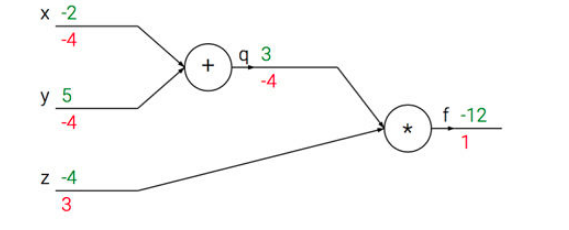

`前向传播过程`：从左向右(绿色部分)；又输入层传递到输出层；   
`反向传播过程`：从右往左(红色部分)；根据链式法则递归地向前计算梯度，直到网络的输入层；所以梯度是从计算链路中回流到输入层的；  

上图中有一个加法门和一个乘法门；在整个计算线路中，每个门控单元需要完成两件事情：1计算该处的输出值, 2 计算输入在该门控单元处的局部梯度；两件事情完全独立不需要知道计算线路中的其他细节。  
反向传播时，根据链接法则门控单元将回传的梯度乘上其局部梯度，从而得到整个网络的输出对该门控单元的每个输入值的梯度。  
加法门输入变量的值是[-2, 5]，计算输出是3；对于两个输入变量的局部梯度都是+1；经过乘法门得到最终值为-12。在反向传播时递归使用链式法则，计算得到各部分的梯度为途中红色数字。如果想要网络的输出值更高，可以让加法门的输出更小一点（梯度为负）或者让$z$值变大(因为导数为正)。继续递归对梯度使用链式法则，加法门拿到梯度，然后把这个梯度分别乘到每个输入值的局部梯度（就是让-4乘以x和y的局部梯度，x和y的局部梯度都是1，所以最终都是-4）。可以得到：减小x，y值（梯度均为负），那么加法门的输出值减小，进而乘法门的输出值增大。  

`即：只要让变量的值沿着梯度方向变化，最终会让整个网络的输出值更高；`  
  函数$f$对应神经网络中的损失函数$loss$，我们的目标是最小化损失函数，所以变量的值应该沿着梯度的反方向改变，
在参数更新时应该加上负梯度，即$W'=W-lr*\triangle W$ 其中$lr$是学习率。

理解这个反向传播的例子再看课件中的反向传播应该会容易一点。

### 5. 激活函数

#### 1). Sigmoid函数  
Sigmoid函数又称Logistic函数，用于隐层神经元输出，取值范围为(0,1)，可以用来做二分类。  
* 公式：$$\sigma(x)=\frac{1}{1+e^{-x}}$$
* 求导：$$\sigma^{\prime}(x)=\sigma(x)[1-\sigma(x)]$$   

* 优点:  
      Sigmoid函数的输出在(0,1)之间，输出范围有限，优化稳定，可以用作输出层；是连续函数，便于求导，导数如上所示；  
* 缺点：  
   1.Sigmoid函数在变量取绝对值非常大的正值或负值时会出现饱和现象，函数会对输入的微小改变会变得不敏感;
     在反向传播时，当梯度接近于0，权重基本不会更新，很容易就会出现梯度消失的情况，从而无法完成深层网络的训练;   
   2.Sigmoid函数的输出不是0均值的，会导致后层的神经元的输入是非0均值的信号，这会对梯度产生影响,可能导致收敛效率低的问题;   
   3.计算复杂度高，因为sigmoid函数是指数形式。

#### 2). Tanh函数  
Tanh函数也称为双曲正切函数，取值范围为[-1,1]， Tanh函数是Sigmoid的变形$\tanh (x)=2 \sigma(2 x)-1$
* 公式：$$\tanh x=\frac{\sinh x}{\cosh x}=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
* 求导：$$Tanh^{\prime}(x)=1-[Tanh(x)]^{2}$$   

* Tanh函数是0均值的，因此实际应用中Tanh会比Sigmoid更好。但是仍然存在梯度饱和与exp计算复杂度高的问题。  


#### 3). ReLU函数  
  ReLU是现代神经网络中最常用的激活函数;
* 公式：$$ReLU(x)=\max (0, x)$$

* 优点:  
   1.使用ReLU的SGD算法的收敛速度比Sigmoid和Tanh快;  
   2.在x>0区域上，不会出现梯度饱和、梯度消失的问题;   
   3.计算复杂度低，不需要进行指数运算，只要一个阈值就可以得到激活值;  
* 缺点：    
   1.ReLU的输出不是0均值的;  
   2.Dead ReLU Problem(神经元坏死现象)：ReLU在负数区域被kill的现象叫做Dead ReLU;    
   ReLU在训练的时很“脆弱”。在x<0时，梯度为0。这个神经元及之后的神经元梯度永远为0，不再对任何数据有所响应，导致相应参数永远不会被更新;    
   产生这种现象的两个原因： 参数初始化问题和Learning Rate太高导致在训练过程中参数更新太大;    
   解决方法：采用Xavier初始化方法，以及避免将Learning Rate设置太大或使用Adagrad等自动调节Learning Rate的算法;  



#### 4). Leaky ReLU函数  
   Leaky ReLU为了解决dead ReLU现象。用一个类似0.01的小值来初始化神经元，从而使得ReLU在负数区域更偏向于激活而不是死掉;
* 公式：$$Leaky ReLU=\max (0.01 x, x)$$